In [10]:
# install.packages("blockmodels")
library("blockmodels")


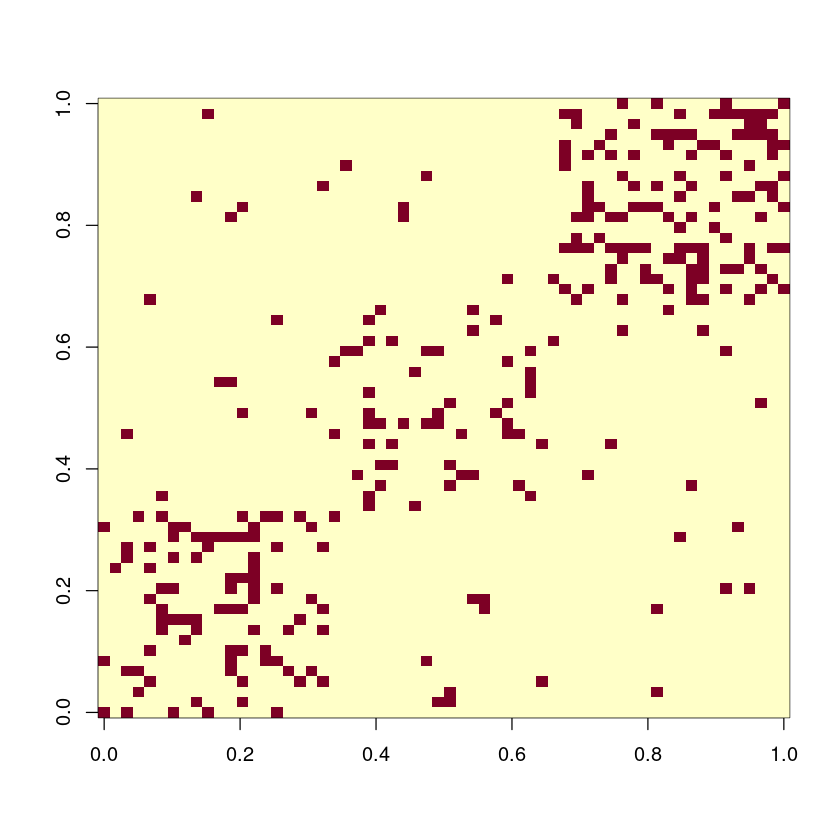

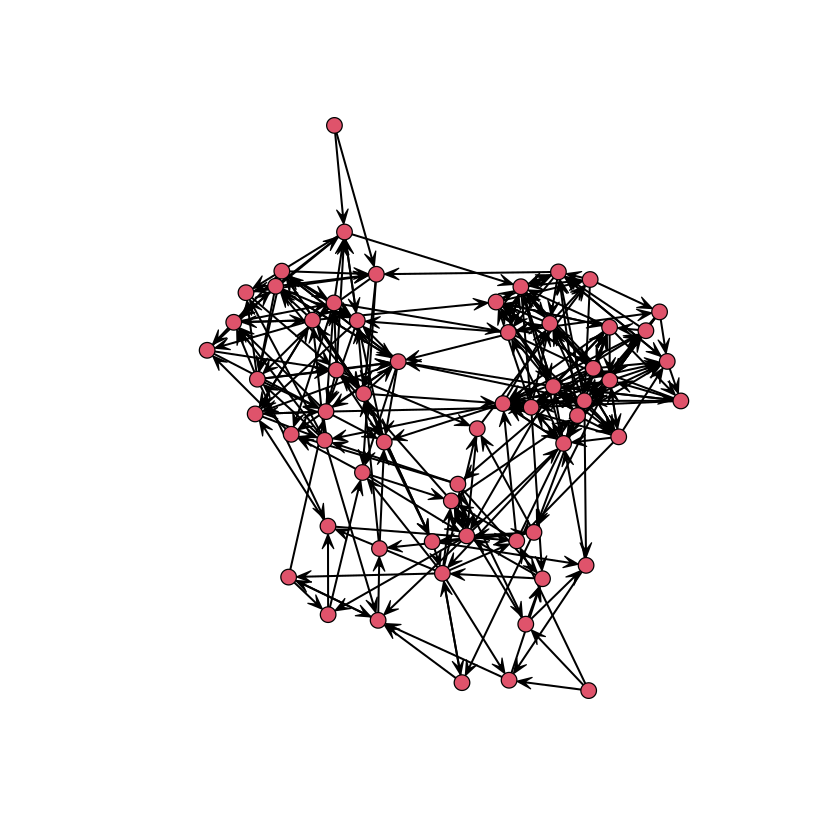

In [11]:
npc <- 20 # nodes per class
n_groups <- 3 # number of groups
n <- npc * n_groups # total number of nodes
Z <- diag(n_groups) %x% matrix(1, nrow = npc, ncol = 1) # group membership matrix
P <- matrix(runif(n_groups * n_groups, 0, 0.25), n_groups, n_groups) # probability matrix
P <- rbind(
  c(0.2, 0.01, 0.01),
  c(0.02, 0.15, 0.01),
  c(0.01, 0.02, 0.25)
) # probability matrix
M <- 1 * matrix(runif(n * n), n, n) < Z %*% P %*% t(Z) # adjacency matrix
image(M)

library(sna)
gplot(M)

-> Estimation for 1 groups
-> Computation of eigen decomposition used for initalizations

-> Pass 1


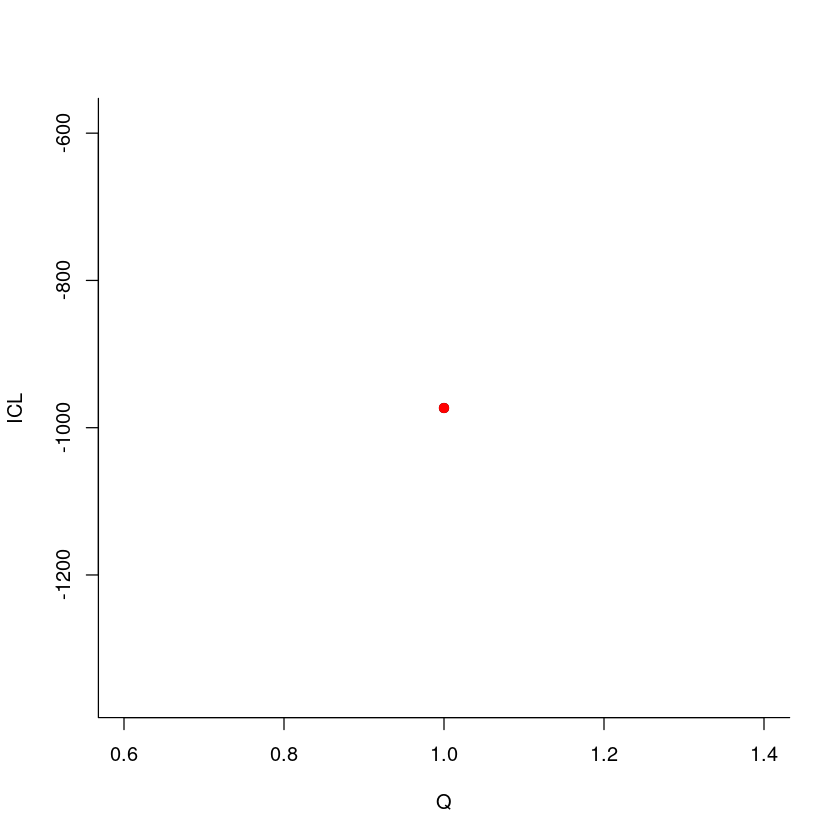

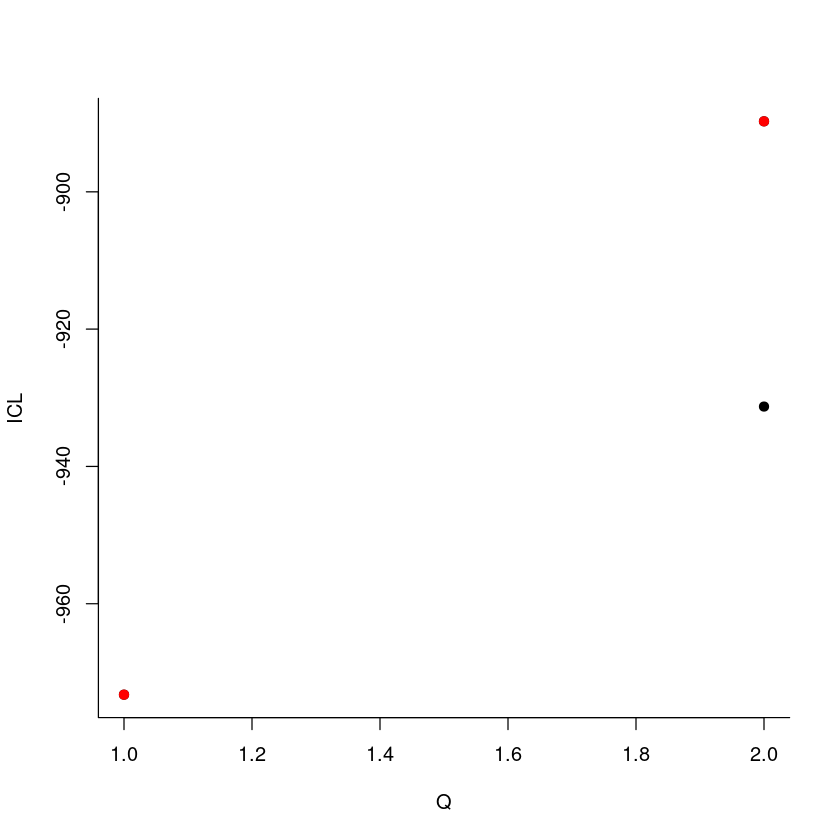

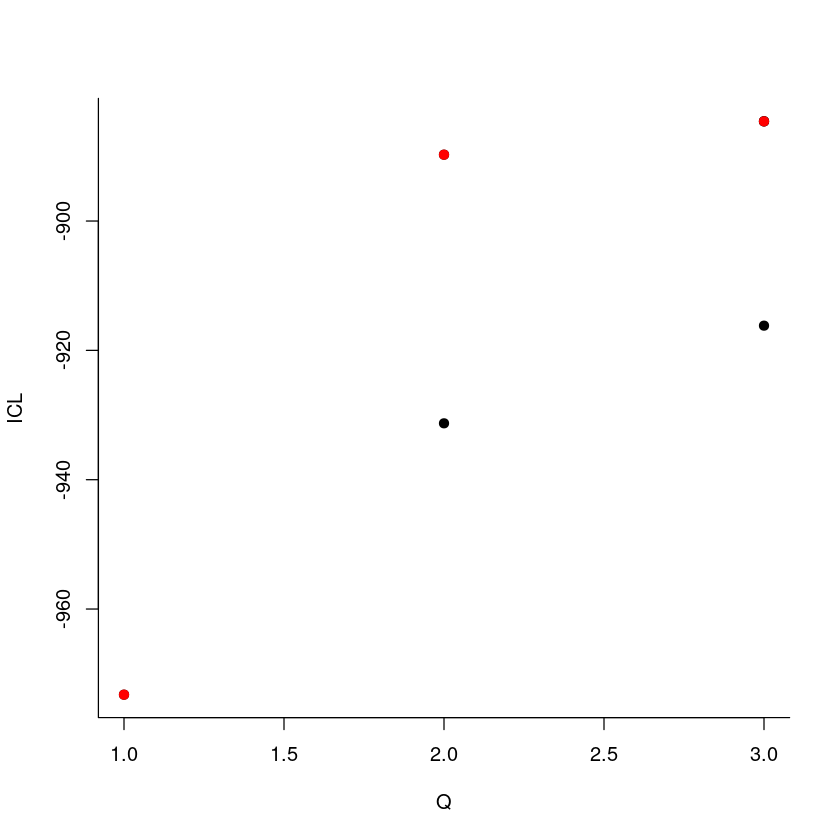

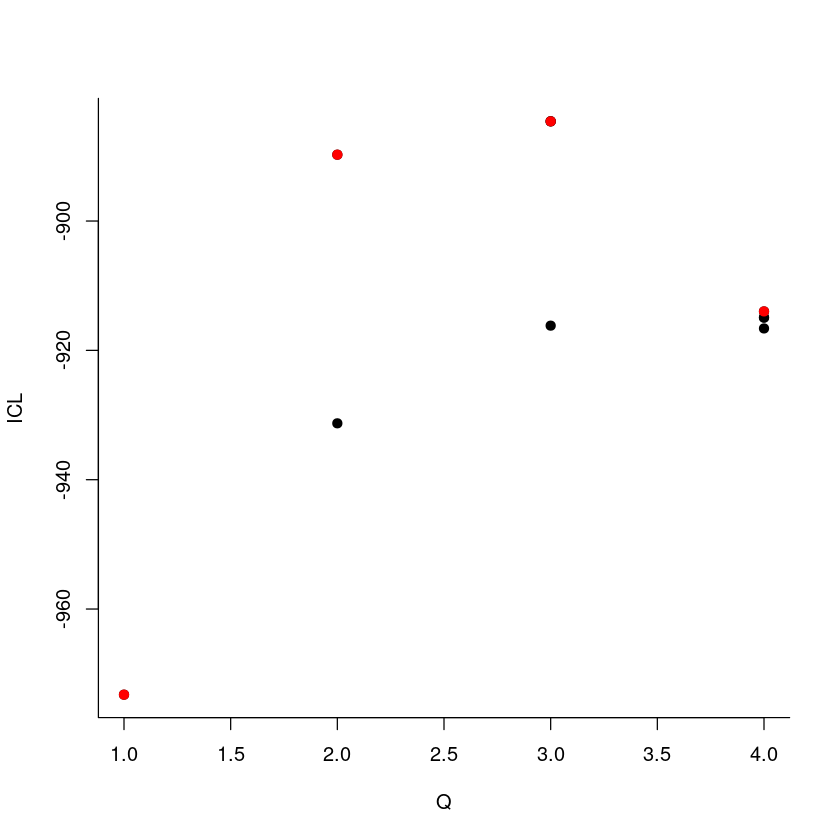

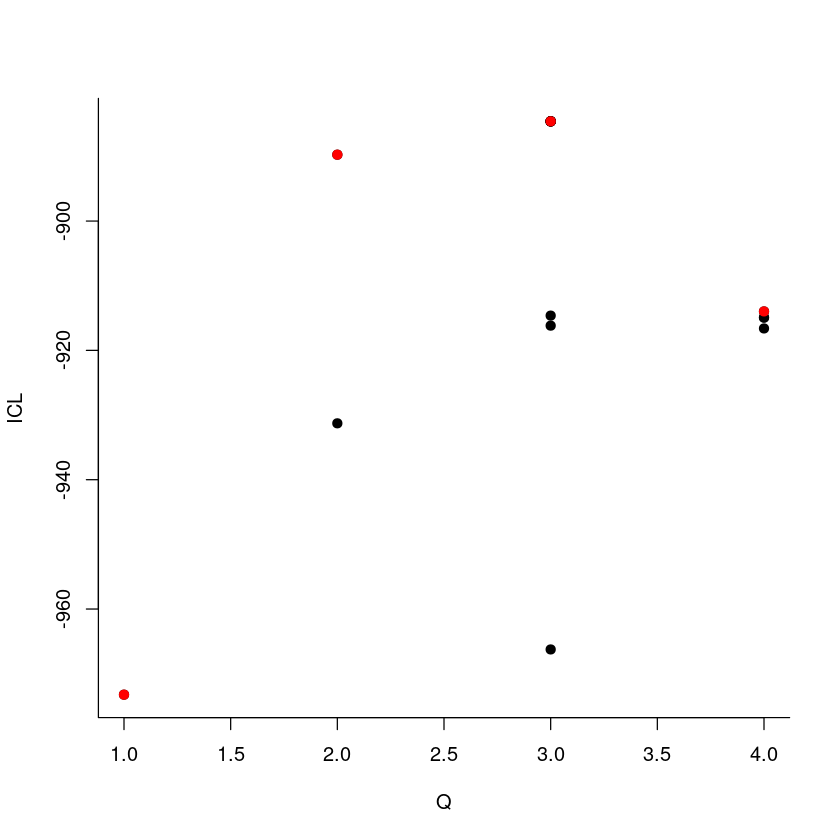

-> Pass 2


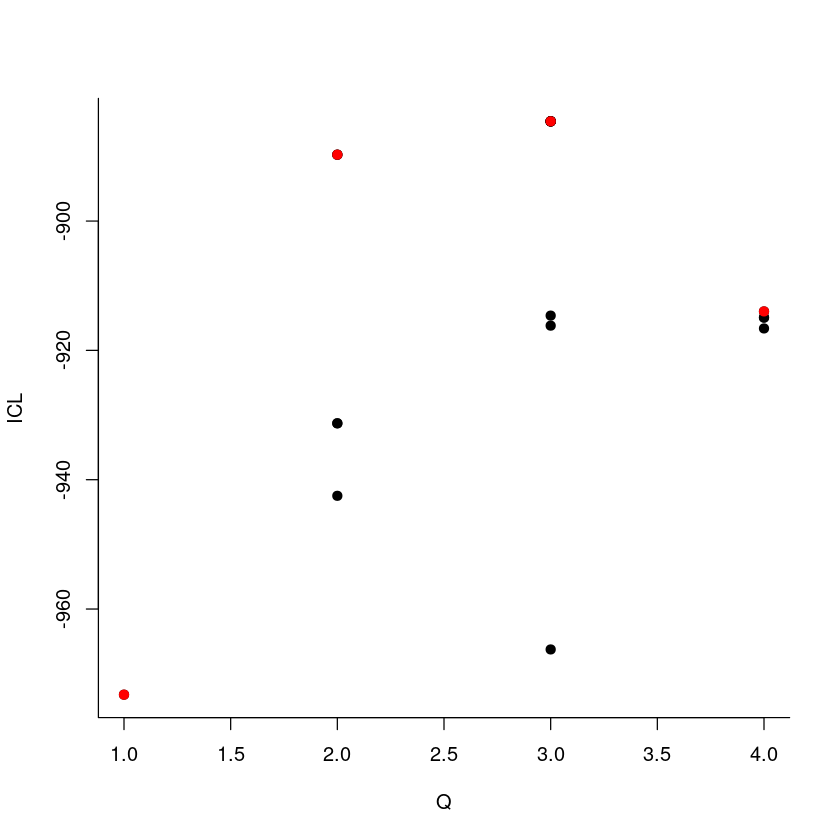

In [12]:
model <- BM_bernoulli("SBM", M, verbosity = 1, explore_max = 4)
model$estimate()


In [13]:
which.max(model$ICL)

[1] 3

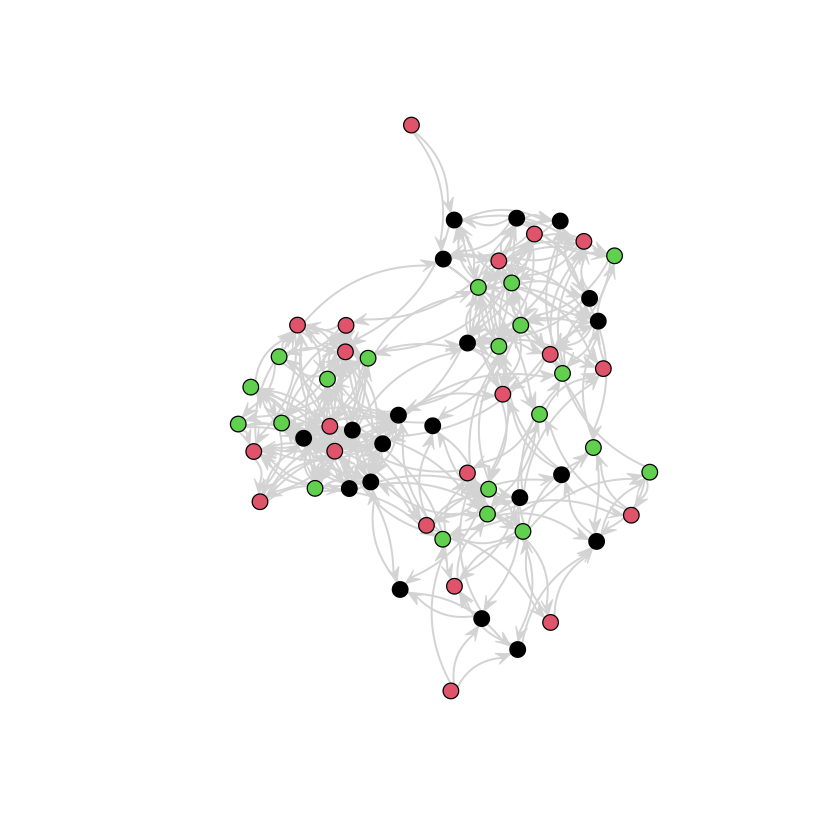

In [14]:
cls <- apply(model$model_parameters[[3]]$pi, 1, which.max)
gplot(M,
  edge.col = "lightgray",
  vertex.col = cls,
  usecurve = TRUE,
)


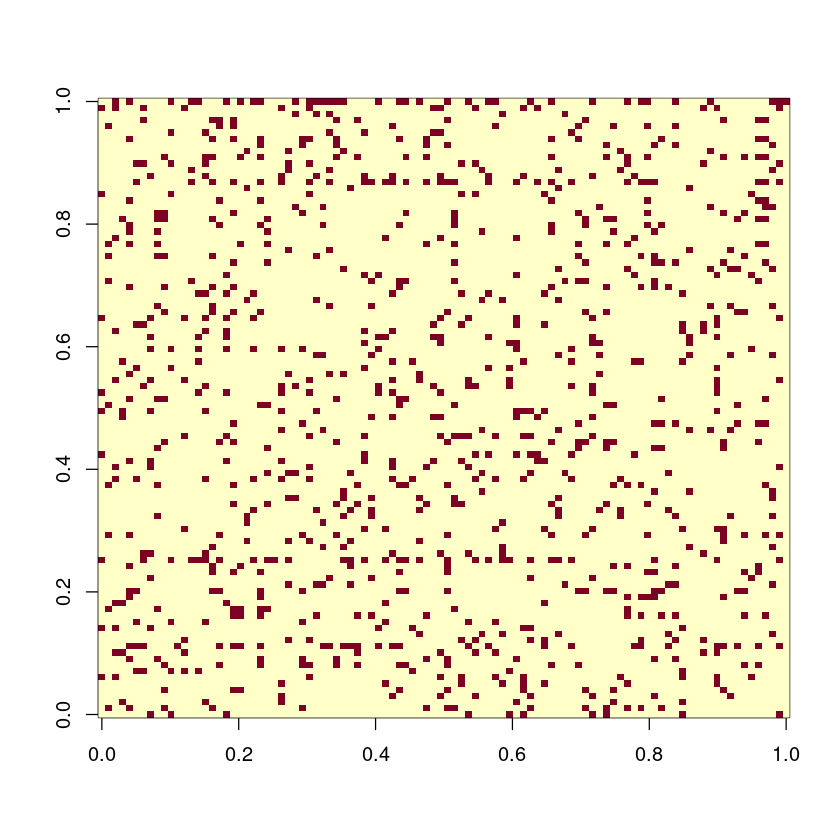

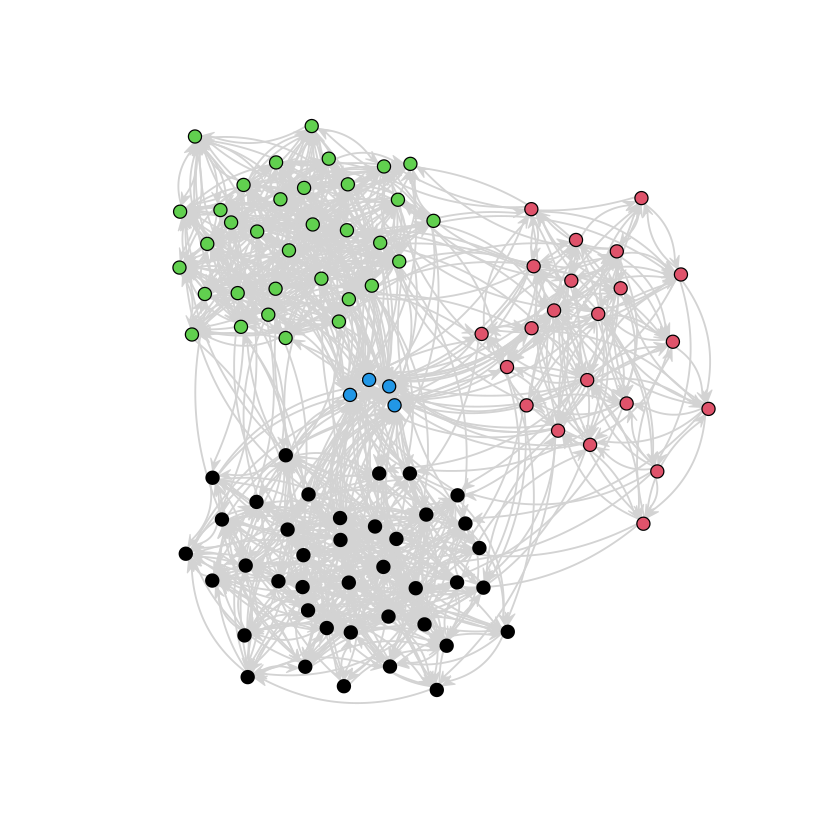

In [15]:
n <- 100
rho <- c(30, 30, 30, 3) / 93
Z <- t(rmultinom(n, 1, rho))
P <- rbind(
  c(0.2, 0.01, 0.01, 0.3),
  c(0.02, 0.25, 0.01, 0.3),
  c(0.01, 0.01, 0.3, 0.3),
  c(0.001, 0.001, 0.001, 0.01)
) # probability matrix
M <- 1 * matrix(runif(n * n), n, n) < Z %*% P %*% t(Z) # adjacency matrix
image(M)

library(sna)
gplot(M, usecurve = TRUE, edge.col = "lightgray", vertex.col = max.col(Z))


-> Estimation for 1 groups
-> Computation of eigen decomposition used for initalizations

-> Pass 1


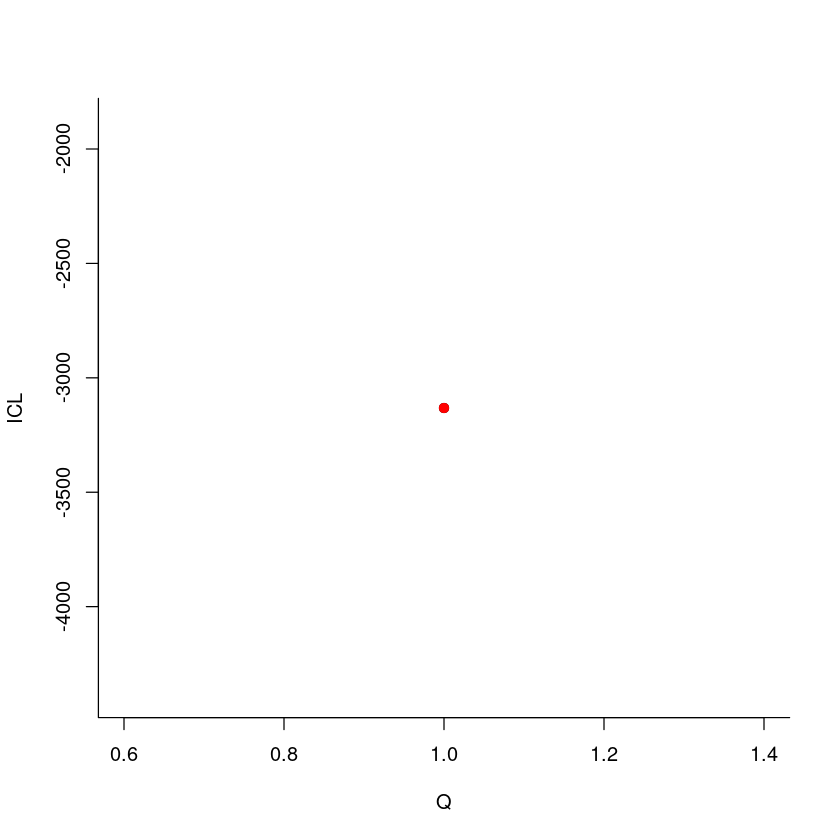

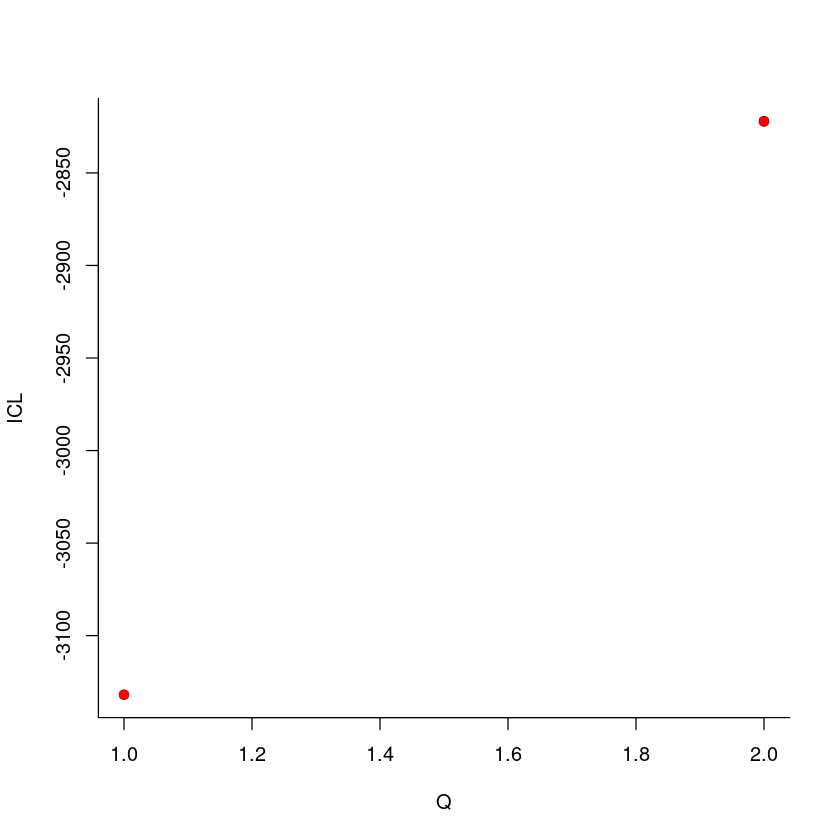

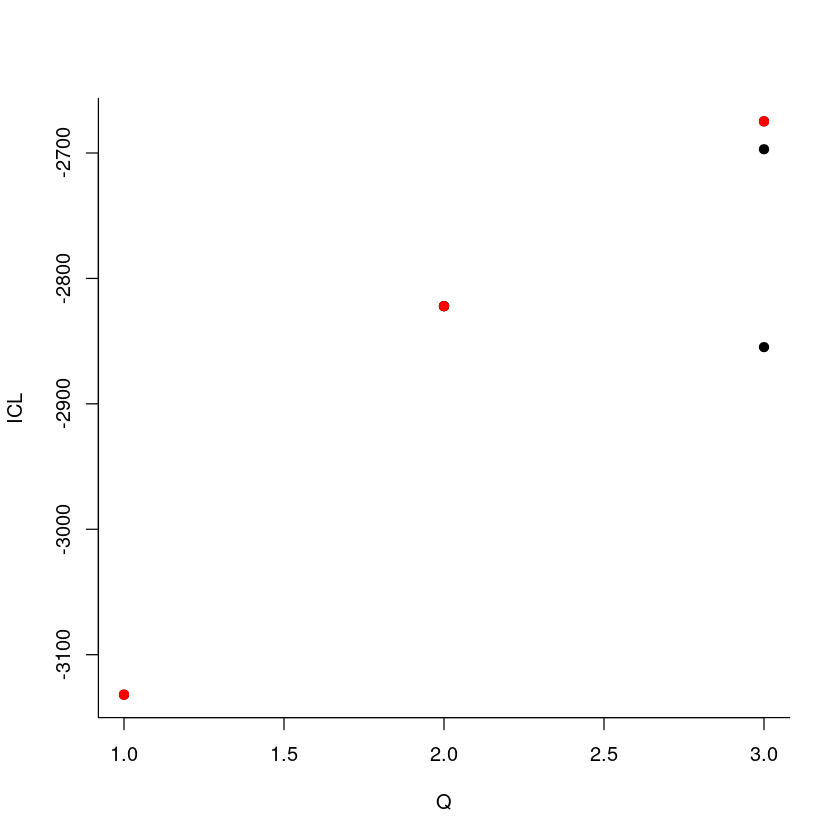

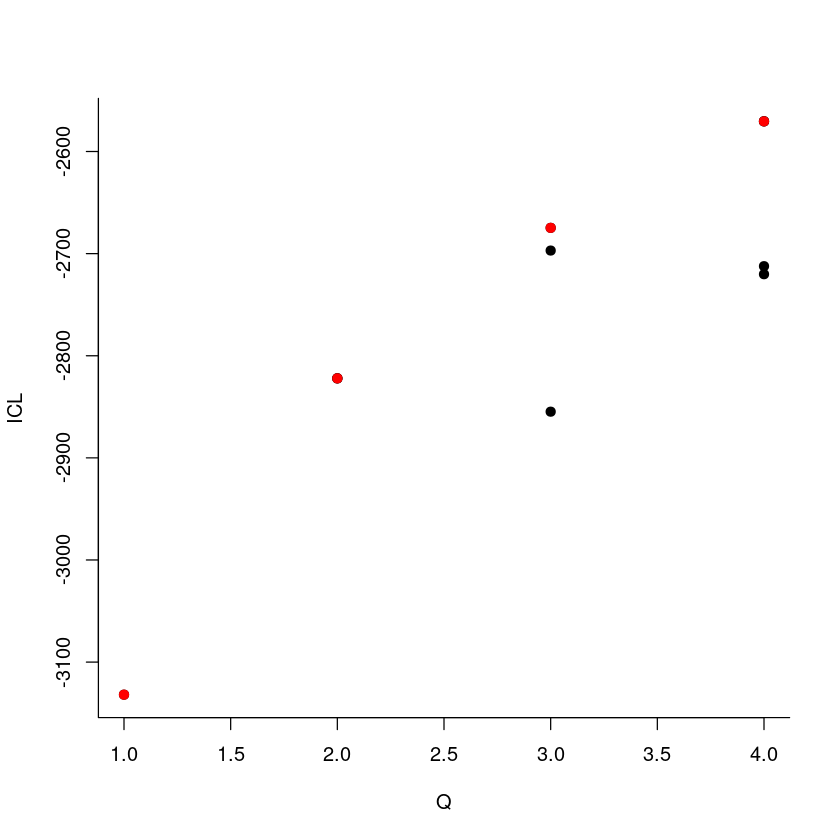

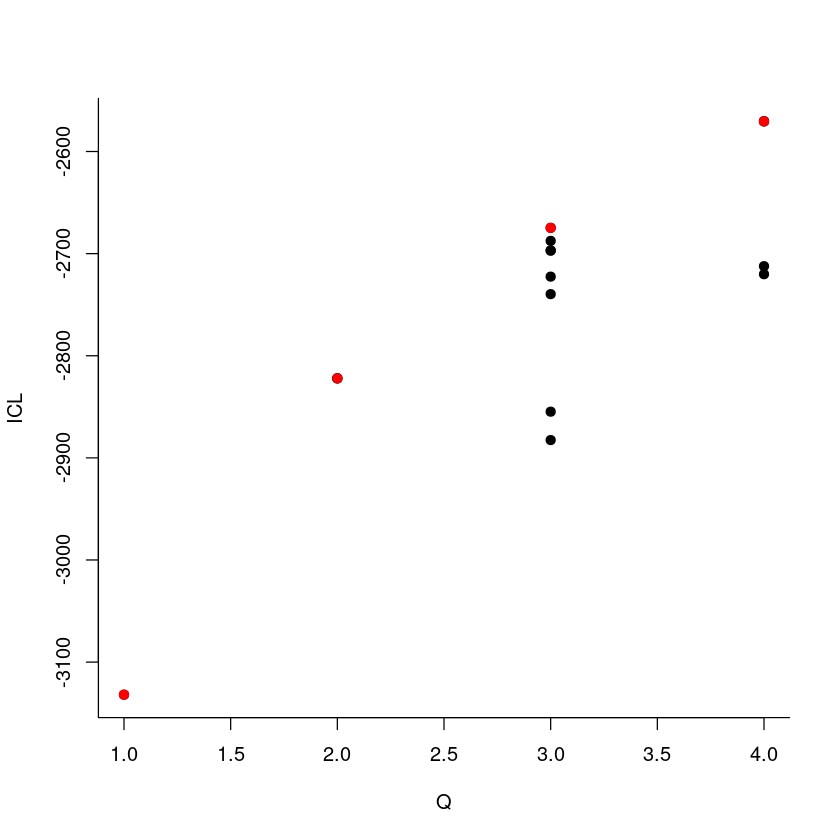

-> Pass 2


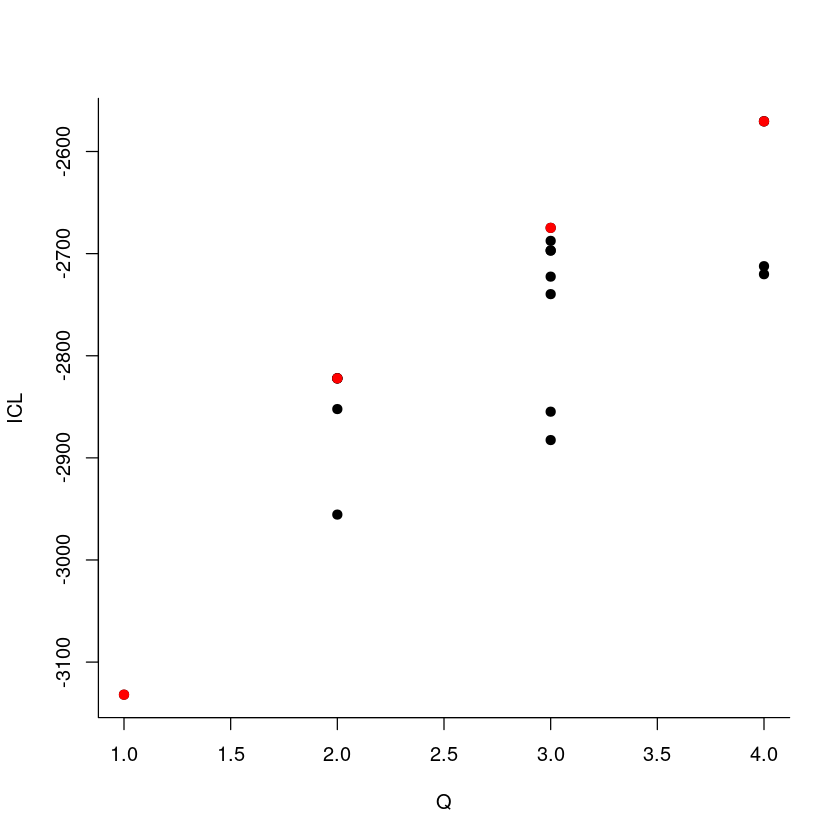

In [16]:
model <- BM_bernoulli("SBM", M, verbosity = 1, explore_max = 4)
model$estimate()

In [17]:
which.max(model$ICL)

[1] 4

In [25]:
# access the "membership" attribute of the model
model$memberships

[[1]]
SBM membership
    Groups: 1 groups
    Nodes: 100 nodes
    Usefull fields and methods:
        $Z : matrix of nodes memberships
        $plot() : plot the memberships

[[2]]
SBM membership
    Groups: 2 groups
    Nodes: 100 nodes
    Usefull fields and methods:
        $Z : matrix of nodes memberships
        $plot() : plot the memberships

[[3]]
SBM membership
    Groups: 3 groups
    Nodes: 100 nodes
    Usefull fields and methods:
        $Z : matrix of nodes memberships
        $plot() : plot the memberships

[[4]]
SBM membership
    Groups: 4 groups
    Nodes: 100 nodes
    Usefull fields and methods:
        $Z : matrix of nodes memberships
        $plot() : plot the memberships
